In [76]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import pandas as pd

In [77]:
df=yf.download('BTC-USD',start='2018-01-01',end='2022-10-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-12-31,12897.700195,14377.400391,12755.599609,14156.400391,14156.400391,12136299520
2018-01-01,14112.200195,14112.200195,13154.700195,13657.200195,13657.200195,10291200000
2018-01-02,13625.000000,15444.599609,13163.599609,14982.099609,14982.099609,16846600192
2018-01-03,14978.200195,15572.799805,14844.500000,15201.000000,15201.000000,16871900160
2018-01-04,15270.700195,15739.700195,14522.200195,15599.200195,15599.200195,21783199744
...,...,...,...,...,...,...
2022-09-26,18803.900391,19274.873047,18721.285156,19222.671875,19222.671875,44148798321
2022-09-27,19221.839844,20338.455078,18915.667969,19110.546875,19110.546875,58571439619
2022-09-28,19104.621094,19688.343750,18553.296875,19426.720703,19426.720703,53071298734


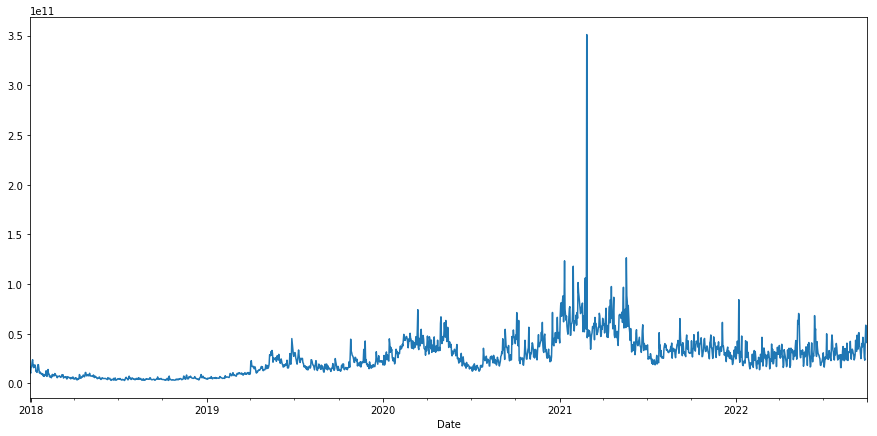

In [78]:
df.Volume.plot(figsize=(15,7))

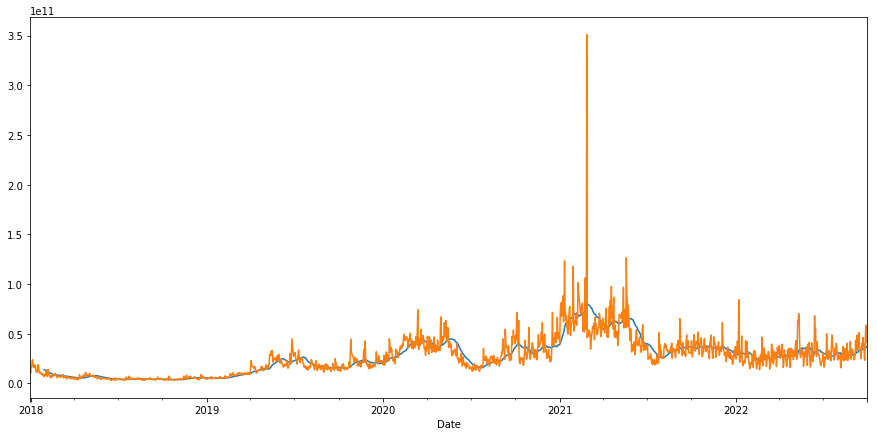

In [79]:
df.Volume.rolling(window=30).mean().plot(figsize=(15,7))
df.Volume.plot(figsize=(15,7))

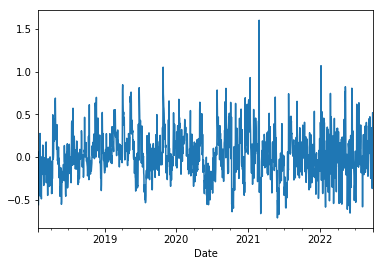

In [80]:
#Normalized the Data
vol_norm=np.log(df['Volume']/df['Volume'].rolling(30).median()).dropna()
vol_norm.plot()

In [81]:
vol_norm

Date
2018-01-29   -0.560072
2018-01-30   -0.362207
2018-01-31   -0.433788
2018-02-01   -0.180849
2018-02-02    0.064352
                ...   
2022-09-26    0.246935
2022-09-27    0.518711
2022-09-28    0.393287
2022-09-29    0.114715
2022-09-30    0.176702
Name: Volume, Length: 1706, dtype: float64

In [82]:
Mon=[]
Tues=[]
Wed=[]
Thur=[]
Fri=[]
Sat=[]
Sun=[]

def get_dsr(day,dsr):
    if day=='Monday':
        Mon.append(float(dsr))
    elif day =='Tuesday':
        Tues.append(float(dsr))
    elif day =='Wednesday':
        Wed.append(float(dsr))
    elif day =='Thursday':
        Thur.append(float(dsr))
    elif day =='Friday':
        Fri.append(float(dsr))
    elif day =='Saturday':
        Sat.append(float(dsr))
    elif day =='Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wronf with the input for the day')

In [83]:
for i in range(0,len(vol_norm)):
    df_date=str(vol_norm.index[i])
    print(df_date)
    df_dsr=vol_norm[i]
    print(df_dsr)
    df_month=df_date.split('-')[1]
    curr_date=df.index[i]
    df_weekday=calendar.day_name[curr_date.weekday()]
    
    get_dsr(df_weekday,df_dsr)

2018-01-29 00:00:00
-0.5600715611180352
2018-01-30 00:00:00
-0.3622067139288753
2018-01-31 00:00:00
-0.4337881870896717
2018-02-01 00:00:00
-0.18084946476721178
2018-02-02 00:00:00
0.0643515024706468
2018-02-03 00:00:00
-0.45446770533084146
2018-02-04 00:00:00
-0.43352354755276507
2018-02-05 00:00:00
-0.1360856903996711
2018-02-06 00:00:00
0.27452595049117856
2018-02-07 00:00:00
-0.11126286702539635
2018-02-08 00:00:00
-0.06256343013254269
2018-02-09 00:00:00
-0.38168653564612215
2018-02-10 00:00:00
-0.2348460396180141
2018-02-11 00:00:00
-0.46055696094339543
2018-02-12 00:00:00
-0.4180677894575346
2018-02-13 00:00:00
-0.49184497476192013
2018-02-14 00:00:00
-0.1540598414860826
2018-02-15 00:00:00
-0.005871788636727543
2018-02-16 00:00:00
-0.20629838136747072
2018-02-17 00:00:00
-0.012181163165483101
2018-02-18 00:00:00
0.004764836312451176
2018-02-19 00:00:00
-0.12250770454896301
2018-02-20 00:00:00
0.13772550840733788
2018-02-21 00:00:00
0.08379107678717401
2018-02-22 00:00:00
-0.054

2020-04-23 00:00:00
0.21450623385569606
2020-04-24 00:00:00
-0.006149576816517698
2020-04-25 00:00:00
-0.052749349863340955
2020-04-26 00:00:00
-0.04885267049729938
2020-04-27 00:00:00
0.04052897673424795
2020-04-28 00:00:00
-0.0452967119499927
2020-04-29 00:00:00
0.550205961501166
2020-04-30 00:00:00
0.6406399234280127
2020-05-01 00:00:00
0.22221810606268927
2020-05-02 00:00:00
0.12870890068186822
2020-05-03 00:00:00
0.2887862628205105
2020-05-04 00:00:00
0.24007849189778627
2020-05-05 00:00:00
0.15744666712623556
2020-05-06 00:00:00
0.2921810497067706
2020-05-07 00:00:00
0.5055195877203496
2020-05-08 00:00:00
0.3373274948691621
2020-05-09 00:00:00
0.19847735360002813
2020-05-10 00:00:00
0.5058886830232462
2020-05-11 00:00:00
0.37197379980860007
2020-05-12 00:00:00
0.024116180852661383
2020-05-13 00:00:00
0.06606552964097065
2020-05-14 00:00:00
0.26422500838992247
2020-05-15 00:00:00
0.09522209085502598
2020-05-16 00:00:00
-0.18063578088951884
2020-05-17 00:00:00
-0.07773761648797356


0.1181141066738672
2021-10-21 00:00:00
0.23634479600899472
2021-10-22 00:00:00
0.05864739662823483
2021-10-23 00:00:00
-0.29882001187550683
2021-10-24 00:00:00
-0.2574622414043636
2021-10-25 00:00:00
-0.12886264582359788
2021-10-26 00:00:00
-0.01416197574499679
2021-10-27 00:00:00
0.1860681557054161
2021-10-28 00:00:00
0.20926025926409375
2021-10-29 00:00:00
0.0006652443050685347
2021-10-30 00:00:00
-0.13571776319983753
2021-10-31 00:00:00
-0.12985379895145033
2021-11-01 00:00:00
-0.01540613971807407
2021-11-02 00:00:00
0.024520036867105993
2021-11-03 00:00:00
-0.019399393566899768
2021-11-04 00:00:00
-0.12157883617367181
2021-11-05 00:00:00
-0.1819321928177153
2021-11-06 00:00:00
-0.22354256050686552
2021-11-07 00:00:00
-0.3862208102278464
2021-11-08 00:00:00
0.11286463877754066
2021-11-09 00:00:00
0.142390747394911
2021-11-10 00:00:00
0.2825454936368113
2021-11-11 00:00:00
-0.013908952024940814
2021-11-12 00:00:00
-0.0014609924811666338
2021-11-13 00:00:00
-0.16954480388327242
2021-1

In [84]:
Sat

[-0.43352354755276507,
 -0.46055696094339543,
 0.004764836312451176,
 -0.3346224037417128,
 -0.20506541743864956,
 -0.14679426560993014,
 -0.042445505636395243,
 -0.34660198182158125,
 -0.3112373813381069,
 -0.42464662106548345,
 -0.012672792065664148,
 0.1979990206892434,
 0.37499296667823745,
 -0.04482111736568076,
 -0.2432904989468765,
 -0.35521009715317436,
 -0.5259707329281118,
 -0.18081718687432188,
 0.13262022490881373,
 -0.461016942684581,
 -0.023032909264920524,
 0.058799503619809276,
 -0.19537939750152186,
 -0.17782402712683062,
 -0.08151909184954599,
 -0.05868768436956149,
 -0.14218716201145187,
 0.18587404686222583,
 -0.3239420530462703,
 -0.25214097174613626,
 0.02883986193473202,
 -0.11780451997139701,
 -0.21776827286262412,
 0.008256744934002224,
 -0.04922101617700726,
 -0.1986441984008687,
 -0.25718973446907006,
 -0.20135585322117464,
 -0.06986752526919728,
 0.1724872022766016,
 0.039830181258874324,
 -0.0018157979366168365,
 0.4462847219021204,
 0.07010842312101608,
 -

In [85]:
days=pd.DataFrame(columns=['Mean'],index=['Monday','Tuesday','wednesday','Thursday','Friday','Satureday','Sunday'])
days.loc['Monday','Mean']=np.mean(Mon)
days.loc['Tuesday','Mean']=np.mean(Tues)
days.loc['wednesday','Mean']=np.mean(Wed)
days.loc['Thursday','Mean']=np.mean(Thur)
days.loc['Friday','Mean']=np.mean(Fri)
days.loc['Satureday','Mean']=np.mean(Sat)
days.loc['Sunday','Mean']=np.mean(Sun)
days

,Mean
Monday,0.06028
Tuesday,0.077311
wednesday,0.073574
Thursday,0.066162
Friday,-0.097143
Satureday,-0.099312
Sunday,0.060128


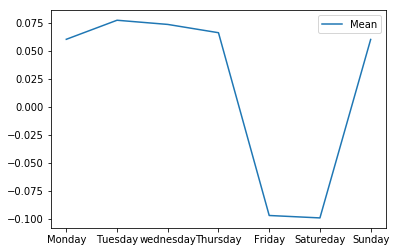

In [86]:
days.plot()

In [93]:
df=yf.download('BTC-USD',start='2019-01-01',end='2020-10-01')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,3866.839111,3868.742920,3725.867432,3742.700439,3742.700439,4661840806
2019-01-01,3746.713379,3850.913818,3707.231201,3843.520020,3843.520020,4324200990
2019-01-02,3849.216309,3947.981201,3817.409424,3943.409424,3943.409424,5244856836
2019-01-03,3931.048584,3935.685059,3826.222900,3836.741211,3836.741211,4530215219
2019-01-04,3832.040039,3865.934570,3783.853760,3857.717529,3857.717529,4847965467
...,...,...,...,...,...,...
2020-09-26,10695.575195,10772.999023,10667.281250,10750.723633,10750.723633,46852525493
2020-09-27,10746.892578,10803.976562,10622.921875,10775.269531,10775.269531,53745972818
2020-09-28,10776.613281,10945.347656,10703.893555,10709.652344,10709.652344,47762394731


In [94]:
#Normalized the Data
vol_norm=np.log(df['Volume']/df['Volume'].rolling(30).median()).dropna()

In [95]:
Mon=[]
Tues=[]
Wed=[]
Thur=[]
Fri=[]
Sat=[]
Sun=[]

def get_dsr(day,dsr):
    if day=='Monday':
        Mon.append(float(dsr))
    elif day =='Tuesday':
        Tues.append(float(dsr))
    elif day =='Wednesday':
        Wed.append(float(dsr))
    elif day =='Thursday':
        Thur.append(float(dsr))
    elif day =='Friday':
        Fri.append(float(dsr))
    elif day =='Saturday':
        Sat.append(float(dsr))
    elif day =='Sunday':
        Sun.append(float(dsr))
    else:
        print('Something is wronf with the input for the day')

In [96]:
for i in range(0,len(vol_norm)):
    df_date=str(vol_norm.index[i])
    print(df_date)
    df_dsr=vol_norm[i]
    print(df_dsr)
    df_month=df_date.split('-')[1]
    curr_date=df.index[i]
    df_weekday=calendar.day_name[curr_date.weekday()]
    
    get_dsr(df_weekday,df_dsr)

2019-01-29 00:00:00
0.10936727859876387
2019-01-30 00:00:00
0.11463786054083022
2019-01-31 00:00:00
0.08537103299286808
2019-02-01 00:00:00
0.002628377101747943
2019-02-02 00:00:00
-0.064346272231028
2019-02-03 00:00:00
-0.06982023173285803
2019-02-04 00:00:00
-0.014146057393243107
2019-02-05 00:00:00
-0.025690526969825628
2019-02-06 00:00:00
0.013498482094804578
2019-02-07 00:00:00
-0.07757731865753027
2019-02-08 00:00:00
0.3542024416319203
2019-02-09 00:00:00
0.1262538210809571
2019-02-10 00:00:00
0.1460957001847745
2019-02-11 00:00:00
0.14145289173651018
2019-02-12 00:00:00
0.16889662465857197
2019-02-13 00:00:00
0.16247508650536285
2019-02-14 00:00:00
0.1360596893136399
2019-02-15 00:00:00
0.09741850374672432
2019-02-16 00:00:00
0.0622408173661396
2019-02-17 00:00:00
0.20987277951708286
2019-02-18 00:00:00
0.5516982350252931
2019-02-19 00:00:00
0.527063164199081
2019-02-20 00:00:00
0.38490872754192007
2019-02-21 00:00:00
0.2683914579118001
2019-02-22 00:00:00
0.26184476861336614
20

In [97]:
days.loc['Monday','2019-2020']=np.mean(Mon)
days.loc['Tuesday','2019-2020']=np.mean(Tues)
days.loc['wednesday','2019-2020']=np.mean(Wed)
days.loc['Thursday','2019-2020']=np.mean(Thur)
days.loc['Friday','2019-2020']=np.mean(Fri)
days.loc['Satureday','2019-2020']=np.mean(Sat)
days.loc['Sunday','2019-2020']=np.mean(Sun)
days

,Mean,2018-2019,2019-2020
Monday,0.06028,0.054842,0.082509
Tuesday,0.077311,0.072557,0.097340
wednesday,0.073574,0.071409,0.117622
Thursday,0.066162,0.046075,0.084280
Friday,-0.097143,-0.065390,-0.019853
Satureday,-0.099312,-0.067660,-0.012327
Sunday,0.060128,0.025432,0.091455


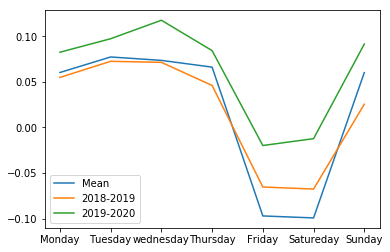

In [99]:
days[['Mean','2018-2019','2019-2020']].plot()

In [ ]:
#We can see year by year it maintain same pattern

In [100]:
calendar.day_name[df.index[0].weekday()]

'Monday'